__Group Member Names:__ Ashton Hansen, Zach Barrett


---

# Homework 4
__Guideline:__ 
* Please write the names of all group members to the __"Group Member Names:"__ line above. 
* Download the data file __tr_eikon_eod_data.csv__ from Sakai (book data) to complete this assignment.
* For the questions that require verbal answers, please answer them in their respective answer cells. 
* For the questions that require code, if your code doesn't work, please include a comment describing your algorithm (if code works well, no explanation is needed). 
* Questions 1 and 3 are each worth 3 points. Questions 2 and 4 are each worth 2 points.
* This homework is due on __Apr. 7, 2021, 5:30 pm.__ You need to upload your completed homework assignment to Sakai as a Jupyter Notebook file (.ipynb) until that time.
---

In [4]:
import numpy as np    
import pandas as pd
import datetime as dt                            # Date formats
import pandas_datareader.data as web             # Downloading data from web
import matplotlib as mpl                         # Plots
import matplotlib.pyplot as plt
from statsmodels import regression               # Regressions
import statsmodels.api as sm
import math                                      # Mathematical functions
import scipy.optimize as sco                     # Optimizations
import scipy.interpolate as sci                  # Interpolations

In [5]:
# Import the data (replace the path with your own):
raw = pd.read_csv("C:/Users/ashha/Documents/GitHub/Finc-399/tr_eikon_eod_data.csv", index_col=0, parse_dates=True)

In [6]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


---

## Question 1

Construct the investment opportunity set of Microsoft and Intel stocks.

Calculate portfolio return and portfolio standard deviation for each level of weight (w) and (1-w), with increments of 0.01, where "w" will be the weight of MSFT and (1-w) will be the weight of INTC stock.

__Graph__ the portfolio return and portfolio standard deviation for each weight with increments of 0.01. (e.g., weight (w) can take values between 0 and 1, inclusive, with increments of 0.01: 0.00, 0.01, 0.02,... 0.99, 1.00 etc.) 

You may get the security prices data from __tr_eikon_eod_data.csv__ file on Sakai. Retrieve the following columns: MSFT.O, INTC.O.

---

     MSFT Weights  INTC Weights   Returns  Volatility
0            0.00          1.00  0.096655    0.014960
1            0.01          0.99  0.096937    0.014891
2            0.02          0.98  0.097218    0.014823
3            0.03          0.97  0.097500    0.014756
4            0.04          0.96  0.097782    0.014690
..            ...           ...       ...         ...
96           0.96          0.04  0.123712    0.014031
97           0.97          0.03  0.123994    0.014086
98           0.98          0.02  0.124276    0.014141
99           0.99          0.01  0.124558    0.014198
100          1.00          0.00  0.124840    0.014256

[101 rows x 4 columns]


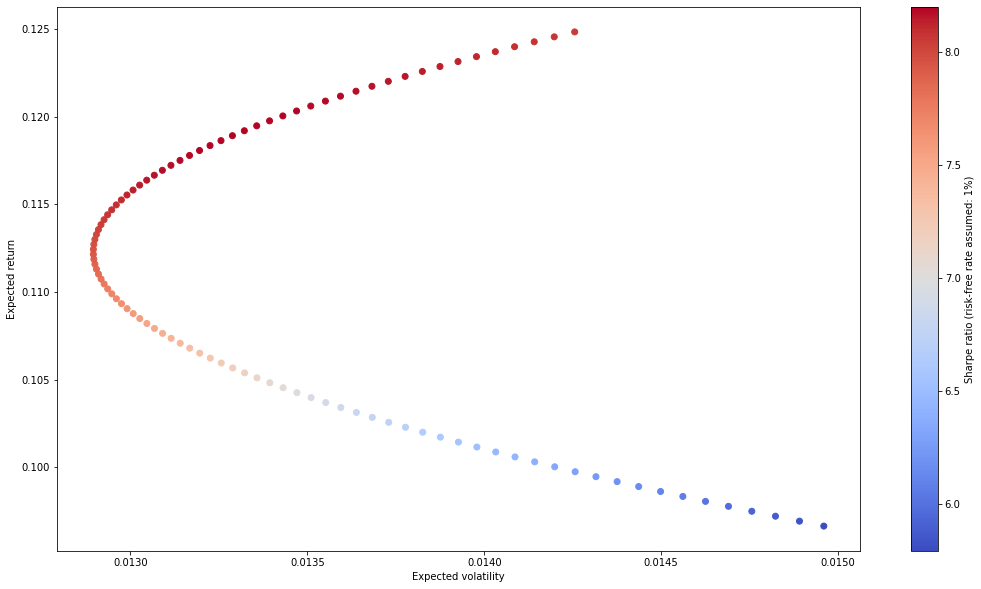

In [256]:
symbols = ['MSFT.O', 'INTC.O']
port = raw[symbols]

wts = pd.DataFrame()
wts['MSFT.weights'] = np.arange(0, 1.01, 0.01)
wts['INTC.weights'] = (1 - wts['MSFT.weights'])

returns = np.log(port / port.shift(1))

mean_rets = pd.DataFrame()
var_rets = pd.DataFrame()
cov_rets = pd.DataFrame()

mean_rets['MSFT'] = np.repeat(returns['MSFT.O'].mean(), len(wts)) # redundant, but data frame will make more sense
mean_rets['INTC'] = np.repeat(returns['INTC.O'].mean(), len(wts)) # also redundant, but useful for reading the data frame output
var_rets['MSFT'] = np.repeat(returns['MSFT.O'].var(), len(wts)) # used in calculating portfolio volatility
var_rets['INTC'] = np.repeat(returns['INTC.O'].var(), len(wts)) # used in calculating portfolio volatility
cov_mat = returns.cov()
cov_rets['Covariance'] = np.repeat(cov_mat['INTC.O'][0], len(wts))

port = pd.DataFrame()
port['MSFT Weights'] = wts['MSFT.weights']
port['INTC Weights'] = wts['INTC.weights']
port['Returns'] = (mean_rets['MSFT'] * wts['MSFT.weights'] + mean_rets['INTC'] * wts['INTC.weights']) * 252
port['Volatility'] = np.sqrt((wts['MSFT.weights']**2 * var_rets['MSFT'] +
                             wts['INTC.weights']**2 * var_rets['INTC'] +
                            2 * wts['MSFT.weights'] * wts['INTC.weights'] * cov_rets['Covariance']))
print(port)


plt.figure(figsize = (18, 10))
plt.scatter(port['Volatility'], port['Returns'], c = (port['Returns']-0.01)/port['Volatility'], cmap = 'coolwarm', marker = 'o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label = 'Sharpe ratio (risk-free rate assumed: 1%)'); # assuming the same risk-free rate used throughout assignment

## Question 2
Suppose we have an investor that is trying to decide on investing \$1000 between two securities (a and b). Both securities cost 10 dollars per unit. A year later security a and b will pay 30 dollars and 5 dollars, respectively in state _u_. And in state _d_, security a will pay 5 dollars, and security b will pay 12 dollars. 

The state _u_  is likely to occur with 30% probability while the state _d_ is likely to occur with 70% probability. And the investor's utility function is _u(w) = w ** 0.5_ (square root of wealth).

How much __money__ out of the total investment of \$1000 the investor should put into each security to maximize the utility?

In [138]:
def utility(p):
    a = p[0]
    b = p[1]
    return -(0.3 * math.sqrt(a * 30 + b * 5) + 0.7 * math.sqrt(a * 5 + b * 12))
cons = ({'type': 'ineq', 'fun': lambda p: 1000 - p[0] * 10 - p[1] * 10})
bnds = ((0, 100000), (0, 100000))

result = sco.minimize(utility, [1, 9], method = 'SLSQP', bounds = bnds, constraints = cons)
result

     fun: -32.974448543012656
     jac: array([-0.16488504, -0.16485596])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([55.79940098, 44.20059902])

$557.99 should be invested into Security A and $442.01 should be invested in Security B to maximize utility.

---

## Question 3
Import the __tr_eikon_eod_data.csv__ file from Sakai. Retrieve the following columns: MSFT.O, AMZN.O, .VIX, INTC.O, AAPL.O

(Alternatively, if you can't get the import to work for some reason, use pandas-datareader to download and merge the stock prices (Adj Close) of MSFT, AMZN, ^VIX, INTC, and AAPL for the last 10 years.)

Assume that risk-free rate is 1% = 0.01. 

a) Write/define functions that calculate the portfolio return and portfolio volatility, respectively. If you put __equal__ amount of your money into each security (equal weight), what would be your portfolio return? What would be the __Sharpe Ratio__ of this equal-weighted portfolio?

In [126]:
# Defining function
def portfolio(prices, weights, sharpe = True, risk_free = 0.01):
    rets = np.log(prices / prices.shift(1))
    returns = np.sum(rets.mean() * weights) * 252
    volatility = math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    if sharpe == True:
        sharpe_ratio = (returns - risk_free)/volatility
        return(returns, volatility, sharpe_ratio)
    else:
        return(returns, volatility)

# Using function
symbols = ['MSFT.O', 'AMZN.O', '.VIX', 'INTC.O', 'AAPL.O'] # columns of interest
data = raw[symbols] # subset columns of interest
wts = np.array([1/5, 1/5, 1/5, 1/5, 1/5]) # Equal weights

port = portfolio(data, weights = wts) 
print(port)

(0.07936811721136747, 0.18528537862204128, 0.3743852738260025)


The portfolio return of an equally weighted portfolio would be 7.9368%, and the sharpe ratio of this portfolio would be 0.3744.

b) Write a program that calculates the weights for the optimal risky portfolio. What is the return of __optimal__ portfolio? What is the __Sharpe Ratio__ of this optimal portfolio?

In [168]:
symbols = ['MSFT.O', 'AMZN.O', '.VIX', 'INTC.O', 'AAPL.O'] # columns of interest
data = raw[symbols] # subset columns of interest
rets = np.log(data / data.shift(1))
eweights = np.array(5 * [1 / 5])

def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

def min_func_sharpe(weights):
    return -(port_ret(weights) - 0.01) / port_vol(weights) 

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1)) 

# Sharpe ratio of equal weights portfolio:
risk_free_rate = 0.01
sharpe_ratio_eq = port[2]

opts = sco.minimize(min_func_sharpe, eweights, method = 'SLSQP', bounds = bnds, constraints = cons)
print("Optimal Weights:", opts['x'])

opt_return = port_ret(opts['x'])
opt_volatility = port_vol(opts['x'])
opt_sharpe = (opt_return - risk_free_rate)/opt_volatility

print("Return of Optimal Portfolio:", opt_return)
print("Optimal Portfolio Sharpe Ratio:", opt_sharpe)

Optimal Weights: [0.12056259 0.45229128 0.06513602 0.01740886 0.34460125]
Return of Optimal Portfolio: 0.19014811131199524
Optimal Portfolio Sharpe Ratio: 1.0467692748481325


The optimal portfolio would be weighted as 12.06% MSFT, 45.23% AMZN, 6.51% ^VIX, 1.74% INTC, and 34.46% AAPL.
The return of this portfolio would be 19.01%, and the portfolio's sharpe ratio would be 1.0468.

---

## Question 4

Import the __tr_eikon_eod_data.csv__ file from Sakai. You'll need the following columns: MSFT.O, AMZN.O, GS.N, .VIX, .SPX.

(Alternatively, if you can't get the import to work for some reason, use pandas-datareader to download and merge the stock prices (Adj Close) of MSFT, AMZN, GS, ^VIX, and ^GSPC for the last 10 years.)

Assume that .SPX represents the market, and that the returns calculated on .SPX are market returns. Further, assume that annual risk-free rate is 1% = 0.01. 

Using the regression analysis, according to CAPM model, calculate the alpha and beta for each of these stocks and indexes. 

In [157]:
symbols = ['MSFT.O', 'AMZN.O', 'GS.N', '.VIX', '.SPX'] # columns of interest
data = raw[symbols] # subset columns of interest
returns = (np.log(raw / raw.shift(1)).dropna())
returns = returns - (0.01/252) # deducting risk-free rate

xvars = sm.add_constant(returns['.SPX'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   .VIX   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3832.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:25:59   Log-Likelihood:                 3438.2
No. Observations:                2061   AIC:                            -6872.
Df Residuals:                    2059   BIC:                            -6861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.133      0.257      -0.001       0.003
.SPX          -6.6405      0.107    -61.904      0.000      -6.851      -6.430
==============================================================================
Omnibus:                      529.093   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7544.657
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                      12.234   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# For MSFT
model_MSFT = regression.linear_model.OLS(returns['MSFT.O'], xvars).fit()
model_MSFT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MSFT.O   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1664.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          4.30e-267
Time:                        17:26:41   Log-Likelihood:                 6446.9
No. Observations:                2061   AIC:                        -1.289e+04
Df Residuals:                    2059   BIC:                        -1.288e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.684e-05      0.000      0.414      0.679      -0.000       0.001
.SPX           1.0163      0.025     40.788      0.000       0.967       1.065
==============================================================================
Omnibus:                      511.627   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31419.464
Skew:                          -0.093   Prob(JB):                         0.00
Kurtosis:                      22.127   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# For AMZN
model_AMZN = regression.linear_model.OLS(returns['AMZN.O'], xvars).fit()
model_AMZN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AMZN.O   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     806.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          5.23e-150
Time:                        17:26:46   Log-Likelihood:                 5531.4
No. Observations:                2061   AIC:                        -1.106e+04
Df Residuals:                    2059   BIC:                        -1.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.953      0.051   -3.01e-06       0.001
.SPX           1.1034      0.039     28.402      0.000       1.027       1.180
==============================================================================
Omnibus:                      529.961   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24886.211
Skew:                           0.379   Prob(JB):                         0.00
Kurtosis:                      20.007   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# For GS.N
model_GSN = regression.linear_model.OLS(returns['GS.N'], xvars).fit()
model_GSN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS.N   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     2169.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          4.94e-324
Time:                        17:27:18   Log-Likelihood:                 6261.9
No. Observations:                2061   AIC:                        -1.252e+04
Df Residuals:                    2059   BIC:                        -1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.465      0.143      -0.001       0.000
.SPX           1.2693      0.027     46.568      0.000       1.216       1.323
==============================================================================
Omnibus:                      392.875   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5251.620
Skew:                          -0.491   Prob(JB):                         0.00
Kurtosis:                      10.758   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# For VIX
model_VIX = regression.linear_model.OLS(returns['.VIX'], xvars).fit()
model_VIX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   .VIX   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3832.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:27:56   Log-Likelihood:                 3438.2
No. Observations:                2061   AIC:                            -6872.
Df Residuals:                    2059   BIC:                            -6861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.133      0.257      -0.001       0.003
.SPX          -6.6405      0.107    -61.904      0.000      -6.851      -6.430
==============================================================================
Omnibus:                      529.093   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7544.657
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                      12.234   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For MSFT:
- Alpha = 9.684e-05; Beta = 1.0163

For AMZN:
- Alpha = 0.0007; Beta = 1.1034

For GS.N:
- Alpha = -0.0004; Beta = 1.2693

For VIX:
- Alpha = 0.0011; Beta = -6.6405